# A Scalable Bayesian Method for Integrating Functional Informationin Genome-wide Association Studies
J. Yang, et al

## Introduction
### GWAS limitations
- GWAS studies identified thousands of loci for complex traits;
- Each associated locus contains hundreds of variants in LD;
- Most loci reside in noncoding regions;
- Underlying biological mechanisms are often unclear
- It is difficult to pinpoint causal variants

### Possible solution and challenge
Integrating functional information into GWASs is expected to help identify and prioritize true associations. Genetic variants can be annotated based on: 
- the genomic location
- role in determining protein structure and function
- ability to regulate gene expression
- biochemical function
- evolutionary significance
- a combination of different types of annotation

Applying this idea in practice requires to account for linkage disequilibrium (LD) and computational cost.

## Methods
The authors developed a flexible Bayesian variable selection model, Bayesian functional GWAS (bfGWAS), for such integrative analysis, based on the standard Bayesian variable selection regression (BVSR) model.

$\boldsymbol{y_{n*1}} = \boldsymbol{X_{n*p}\beta_{p*1}} + \boldsymbol{\epsilon_{n*1}}$

n individuals and p genetic variants. $\beta$ follows a spike-and-slab variable selection prior.

### Classify variants into 5 non-overlapping categories
- non-synonymous variants
- synonymous variants
- intronic variants
- intergenic variants
- other genomic variants

Same category q share an effect size prior with parameter($π_q,σ^2_q$). Specific classifiction is showed as follows:

> /home/min/Downloads/Classification.png (81.5 KiB):

WARNING: unrecognized arguments: --dpi 50

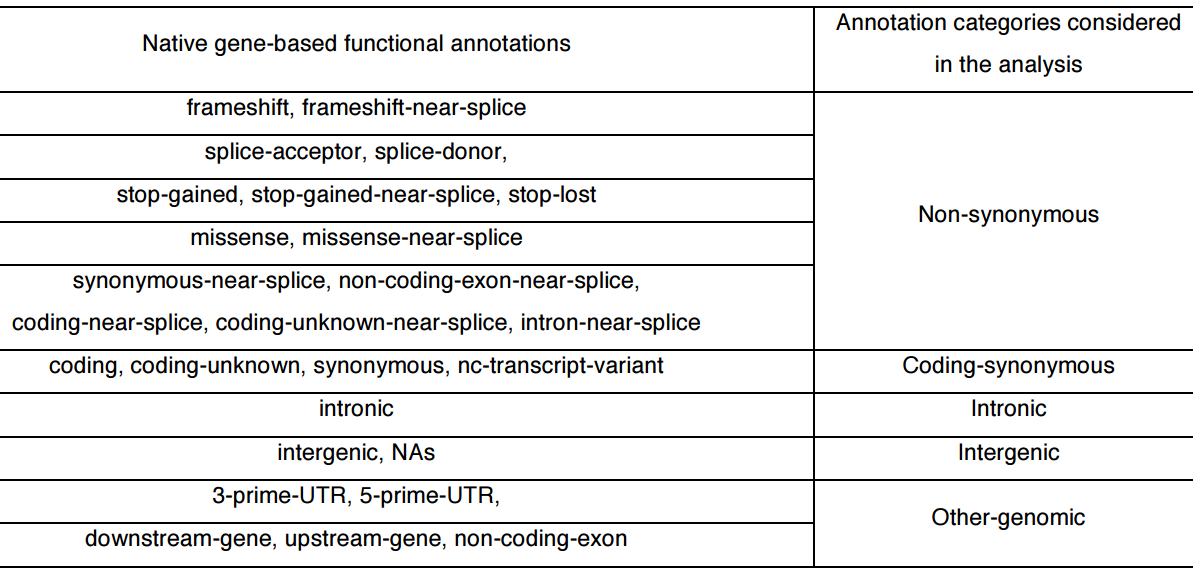

In [2]:
%preview /home/min/Downloads/Classification.png

### Strategy
- Make inference on category-specific parameters ($π_q,σ^2_q$)
- Make inference on variant-specific parameters $β_i$ and the probability that $β_i \ne 0$ (the probability for the variant to be associated with the phenotype, PIP)
- Share information genome-wide to estimate the category-specific parameters, which then inform the variant-specific parameters

### Blocks
- 5,000 - 10,000 variants
- Marginal association evidence, genomic distance and LD
- Ensure variants in LD ($R_2>0.1$) with significant signals($p<5∗10^{−8}$) in the same block
- Segment the whole genome into 1,063 non-overlapped blocks

### Block-wise EM-MCMC steps:
Repeat the following steps until the estimates of ($π_q,σ^2_q$) converge:
1. Initialize category-specific parameters ($π_q,σ^2_q$)
2. Run MCMC algorithm per genome block in parallel to obtain posterior estimates of ($β,\text{PP}_i$), which is E step
3. Summarize MCMC posterior estimates of ($β,\text{PP}_i$) cross all blocks (genome-wide posterior) to update ($π_q,σ^2_q$), which is M step

> /home/min/Downloads/EM-MCMC.png (114.7 KiB):

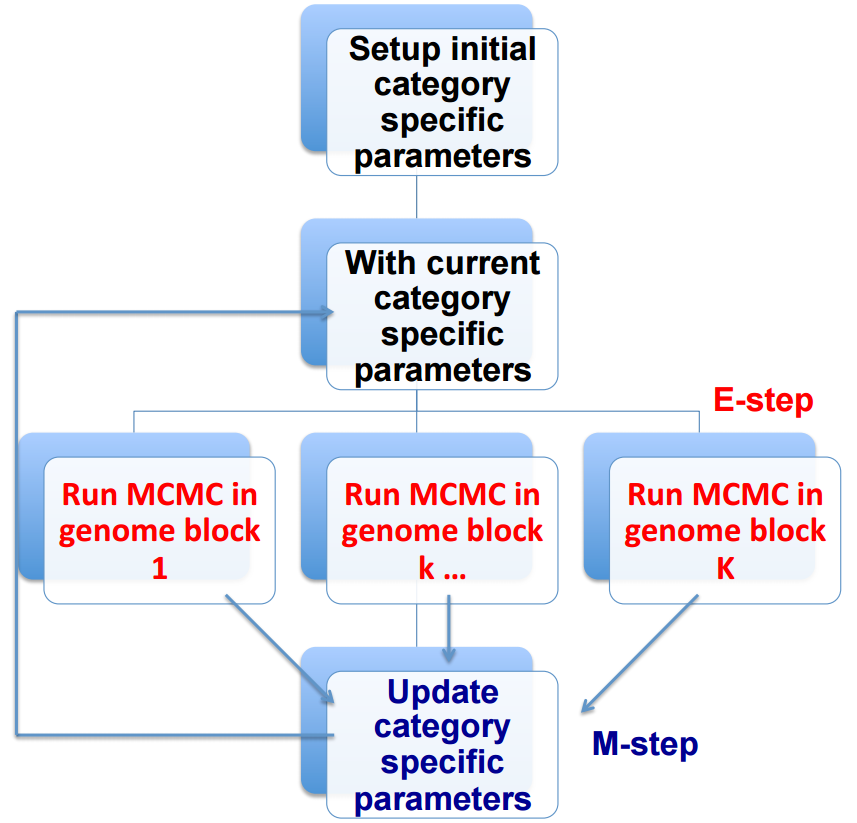

In [3]:
%preview /home/min/Downloads/EM-MCMC.png

### Enhancements to previous Bayesian models
- In each category, model both the proportion of associated variants (probability of causality for variants) and their effect-size distribution.
- Jointly model genome-wide variants to account for LD among variants of different annotation categories.
- Allow multiple signals per locus.

## Simulation Results
- Segment chromosomes 18-22 into 100*2.5 Mb blocks, each with about 5K variants.
- 20 causal SNPs in total:  randomly select 2 causal SNPs per locus for 10 randomly selected loci.

bfGWAS suggests higher power compared to the other two methods.

> /home/min/Downloads/ROC.png (89.6 KiB):

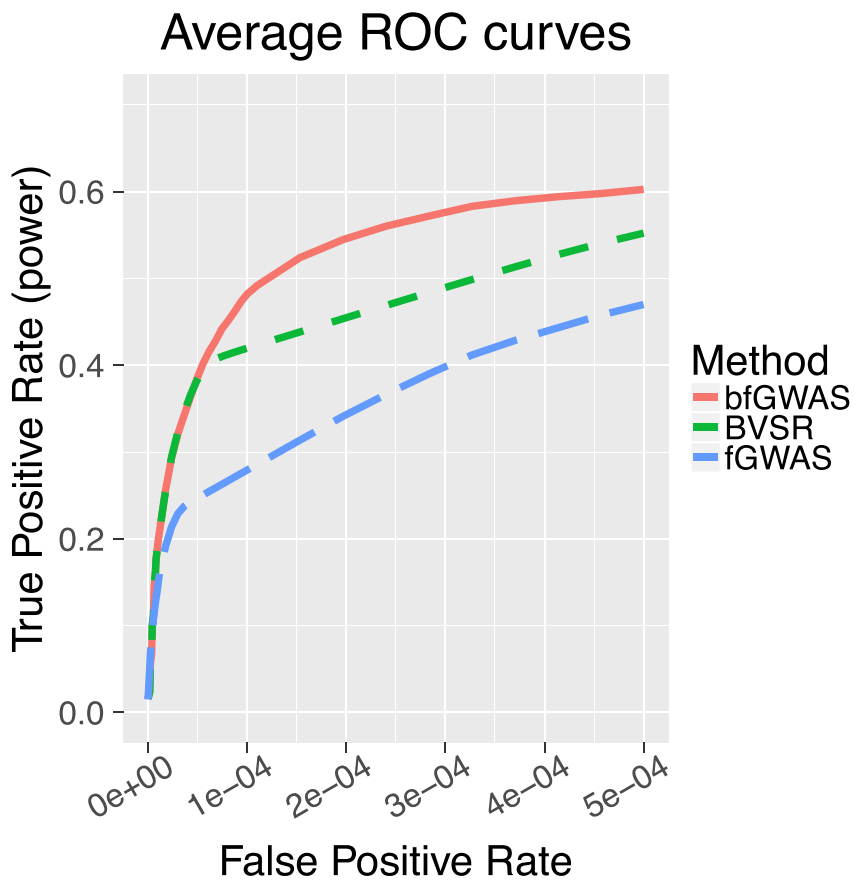

In [4]:
%preview /home/min/Downloads/ROC.png

## bfGWAS on Age-related macular degeneration (AMD) GWAS results
The GWAS data of AMD consist of 33,976 unrelated European samples (16,144 cases and 17,832 controls), and a total of 12,023,830 genotyped on a customized Exome-Chip.

bfGWAS identified:
- 32 out of 34 known AMD loci and 5 extra candidate loci
- 150 associated variants
    - 47 among 42,005 non-synonymous variants -1:1,000
    - 4 among 67,165 synonymous coding variants - 1:15,000
    - 54 among 3,679,235 intronic variants - 1:100,000
    - 18 among 5,512,423 intergenic variants - 1:300,000
    - 27 among 565,916 other genomic variants - 1:20,000

fGWAS identified:
- 34 out of 34 known AMD loci and 5 extra candidate loci
- 94 associated variants
    - 22 among 42,005 non-synonymous variants
    - 6 among 67,165 synonymous coding variants
    - 28 among 3,679,235 intronic variants
    - 15 among 5,512,423 intergenic variants
    - 23 among 565,916 other genomic variants

The following figure showed category-specific parameter estimates, causal probabilities (left) and effect-size variances (right)for gene-based annotations.

> /home/min/Downloads/Results.png (54.2 KiB):

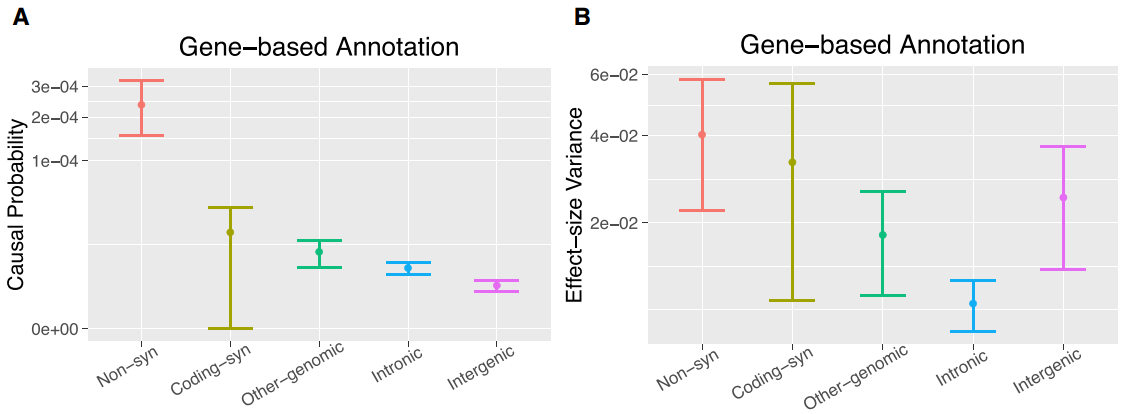

In [5]:
%preview /home/min/Downloads/Results.png

## Discussion
- Advantages:
    - integrating functional information in GWASs
    - accounts for LD and allows for the possibility of multiple signals per locus
    - employs an improved MCMC sampling strategy to greatly improve the mixing of MCMC samples


- Limitations:
    - computational cost, since the methods perform MCMC using the complete genotype data
    - key assumption: the variant correlation matrix has a block-wise structure, by segmenting the genome into approximately independent blocks